In [1]:
from RL_brain_b import DeepQNetwork
import numpy as np
import time
import SYCLOP_env as syc
from misc import *
hp=HP()
hp.mem_depth = 2
hp.max_episode = 3
hp.steps_per_episode = 10000
hp.steps_between_learnings = 1000
def local_observer(sensor,agent):
    return np.concatenate([np.abs(sensor.dvs_view[5,:].reshape([-1])),1*agent.qdot,0.1*agent.q])

In [5]:
    vertical_edge_mat = np.zeros([28,128])
    vertical_edge_mat[:,64:] = 1.0
    recorder = Recorder(n=6)


    scene = syc.Scene(image_matrix=vertical_edge_mat)
    sensor = syc.Sensor()
    agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])
    reward = syc.Rewards()
    observation_size = sensor.hp.winx+2+2
    RL = DeepQNetwork(len(agent.hp.action_space), observation_size*hp.mem_depth,#sensor.frame_size+2,
                      reward_decay=0.9,
                      e_greedy=0.99,
                      e_greedy0=0.85,
                      replace_target_iter=10,
                      memory_size=30000,
                      e_greedy_increment=0.001,
                      state_table=None
                      )


    hp.scene = scene.hp
    hp.sensor = sensor.hp
    hp.agent = agent.hp
    hp.reward = reward.hp
    hp.RL = RL.hp


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
RL.dqn.load_nwk_param('best_thus_far.nwk')

In [8]:
RL.epsilon = 0.99999999

In [23]:
contrasts = [1.0]*20 # [0.0, 0.1, 0.5, 0.8, 1.0, 1.5, 2.0]

In [24]:
    rec_episodes = {}
    for episode, cc in enumerate(contrasts):
        vertical_edge_mat = np.zeros([28,128])
        vertical_edge_mat[:,64:] = 1.0
        scene.image =  cc*vertical_edge_mat
        agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy]) #todo: reset method for agent
        observation = np.zeros([hp.mem_depth, observation_size])
        observation_ = np.zeros([hp.mem_depth, observation_size])
        rec_episodes[episode] = Recorder(n=6)
        for step in range(hp.steps_per_episode):
            action = RL.choose_action(observation.reshape([-1]))
            reward.update_rewards(sensor = sensor, agent = agent)
            agent.act(action)
            sensor.update(scene,agent)
            observation_[1:,:] = observation_[:-1,:]
            observation_[0,:]  =  local_observer(sensor, agent)  # todo: generalize
            RL.store_transition(observation.reshape([-1]), action, reward.reward, observation_.reshape([-1]))
            rec_episodes[episode].record([agent.q_ana[0],agent.q[0],agent.qdot[0],reward.rewards[0],reward.rewards[1],reward.reward])
#             if (step > 100) and (step % hp.steps_between_learnings == 0):
#                 RL.learn()
            observation = observation_
            step += 1
            if step%1000 ==0:
                print(episode,step)
                # policy_map = np.array([np.argmax(RL.compute_q_eval(np.eye(10)), axis=1),
                #                         np.argmax(RL.compute_q_eval(debu2el), axis=1)])
                # if np.max(np.abs(old_policy_map - policy_map))>0:
                #     print(policy_map)
                #     print('policy_change')
                #     print(policy_map-old_policy_map)
                #     print('--------------------------------')
                #     old_policy_map = policy_map
#             if step%10000 ==0:
#                     recorder.plot()
#                     RL.dqn.save_nwk_param('temp4.nwk')

0 1000
0 2000
0 3000
0 4000
0 5000
0 6000
0 7000
0 8000
0 9000
0 10000
1 1000
1 2000
1 3000
1 4000
1 5000
1 6000
1 7000
1 8000
1 9000
1 10000
2 1000
2 2000
2 3000
2 4000
2 5000
2 6000
2 7000
2 8000
2 9000
2 10000
3 1000
3 2000
3 3000
3 4000
3 5000
3 6000
3 7000
3 8000
3 9000
3 10000
4 1000
4 2000
4 3000
4 4000
4 5000
4 6000
4 7000
4 8000
4 9000
4 10000
5 1000
5 2000
5 3000
5 4000
5 5000
5 6000
5 7000
5 8000
5 9000
5 10000
6 1000
6 2000
6 3000
6 4000
6 5000
6 6000
6 7000
6 8000
6 9000
6 10000
7 1000
7 2000
7 3000
7 4000
7 5000
7 6000
7 7000
7 8000
7 9000
7 10000
8 1000
8 2000
8 3000
8 4000
8 5000
8 6000
8 7000
8 8000
8 9000
8 10000
9 1000
9 2000
9 3000
9 4000
9 5000
9 6000
9 7000
9 8000
9 9000
9 10000
10 1000
10 2000
10 3000
10 4000
10 5000
10 6000
10 7000
10 8000
10 9000
10 10000
11 1000
11 2000
11 3000
11 4000
11 5000
11 6000
11 7000
11 8000
11 9000
11 10000
12 1000
12 2000
12 3000
12 4000
12 5000
12 6000
12 7000
12 8000
12 9000
12 10000
13 1000
13 2000
13 3000
13 4000
13 5000
13 6000

<IPython.core.display.Javascript object>


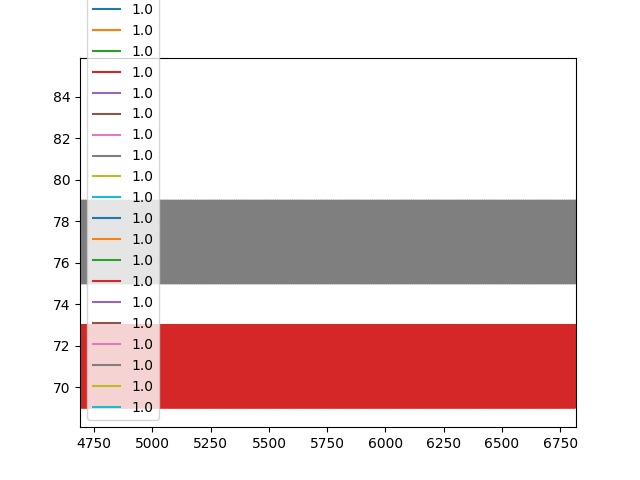

In [25]:
plt.figure()
for episode, cc in enumerate(contrasts):
    plt.plot(rec_episodes[episode].records[0])
plt.legend([str(cc) for cc in contrasts])

<IPython.core.display.Javascript object>


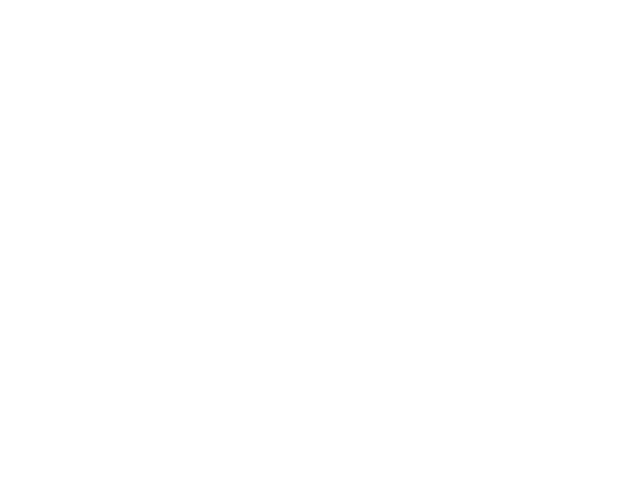

<IPython.core.display.Javascript object>


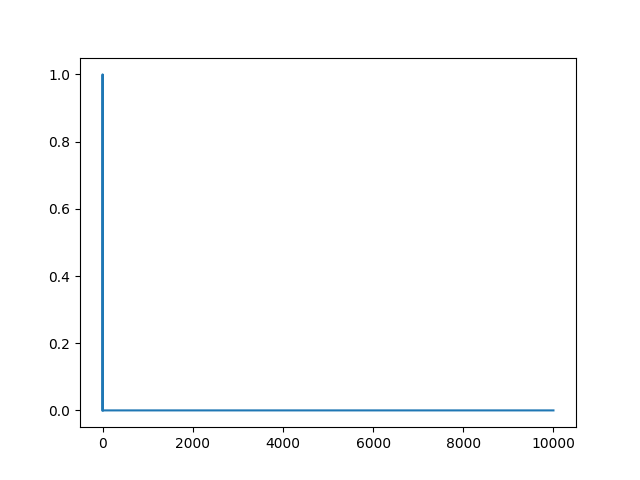

<IPython.core.display.Javascript object>


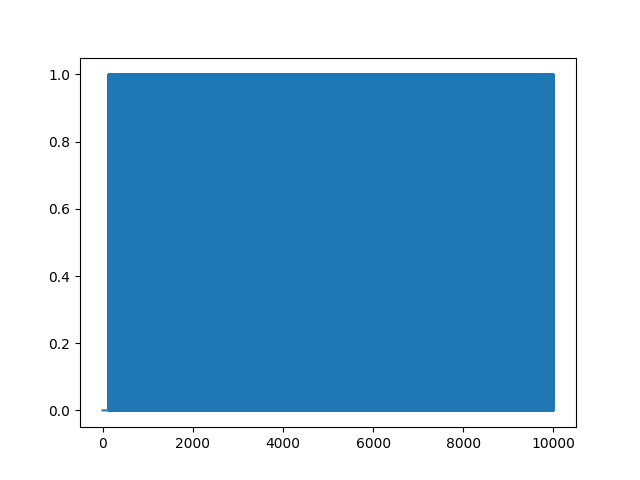

<IPython.core.display.Javascript object>


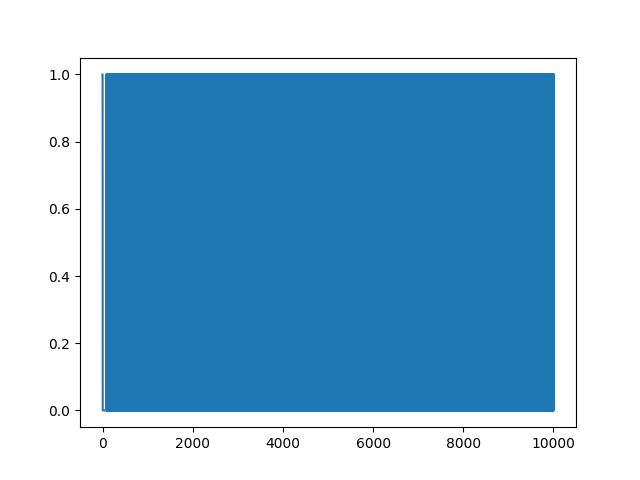

<IPython.core.display.Javascript object>


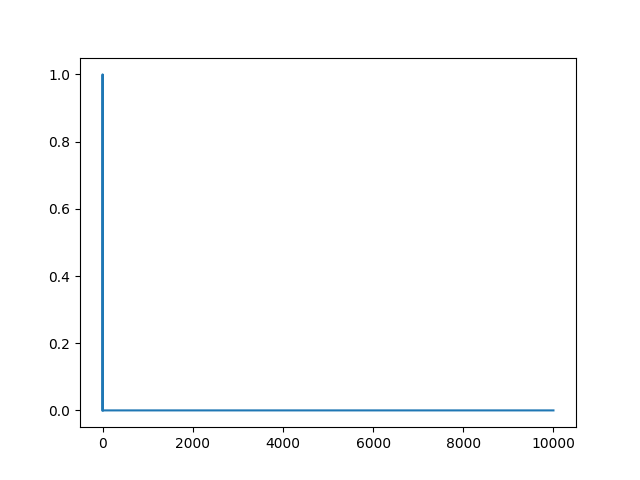

<IPython.core.display.Javascript object>


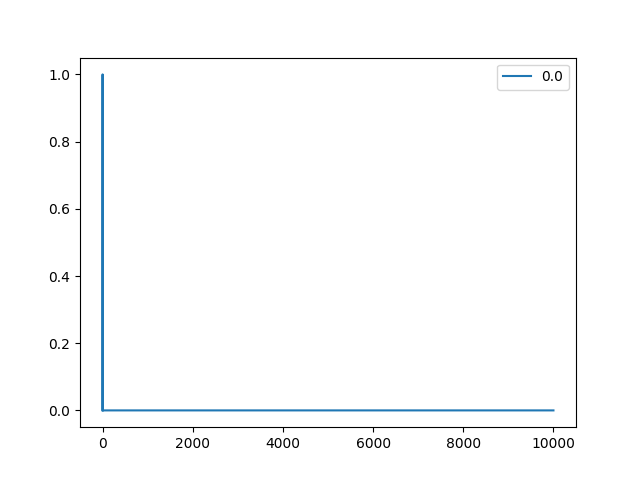

In [20]:
plt.figure()
for episode, cc in  enumerate([1.0]*5):
    plt.figure()
    plt.plot(rec_episodes[episode].records[3])
plt.legend([str(cc) for cc in contrasts])

In [24]:
(np.sum([1.,2.,3])>1)*0.5

0.5

In [27]:

for episode, cc in  enumerate(contrasts):
    print(np.mean(rec_episodes[episode].records[0]),':',np.mean(rec_episodes[episode].records[3]))


60.6222 : 0.3989
62.0022 : 0.7497
62.999 : 0.4999
62.5 : 0.5001
60.758 : 0.3958
61.5372 : 0.4978
65.5001 : 0.0002
77.0 : 0.0
0.022 : 0.0001
40.5 : 0.0
62.5 : 0.5
33.4998 : 0.0001
65.5 : 0.0001
71.0648 : 0.0
26.4988 : 0.0001
60.7757 : 0.3964
61.5912 : 0.4966
23.4694 : 0.0002
60.8617 : 0.3948
60.6222 : 0.399


<IPython.core.display.Javascript object>


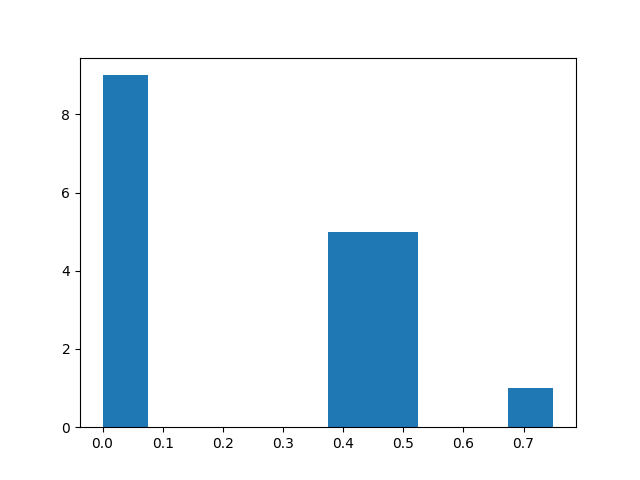

(array([9., 0., 0., 0., 0., 5., 5., 0., 0., 1.]),
 array([0.     , 0.07497, 0.14994, 0.22491, 0.29988, 0.37485, 0.44982,
        0.52479, 0.59976, 0.67473, 0.7497 ]),
 <a list of 10 Patch objects>)

In [28]:
qq=[]
for episode, cc in  enumerate(contrasts):
    qq.append(np.mean(rec_episodes[episode].records[3]))
plt.figure()
plt.hist(qq)

<IPython.core.display.Javascript object>


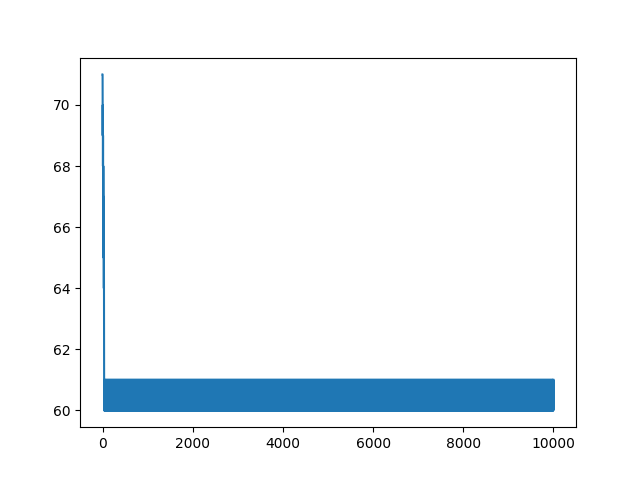

<IPython.core.display.Javascript object>


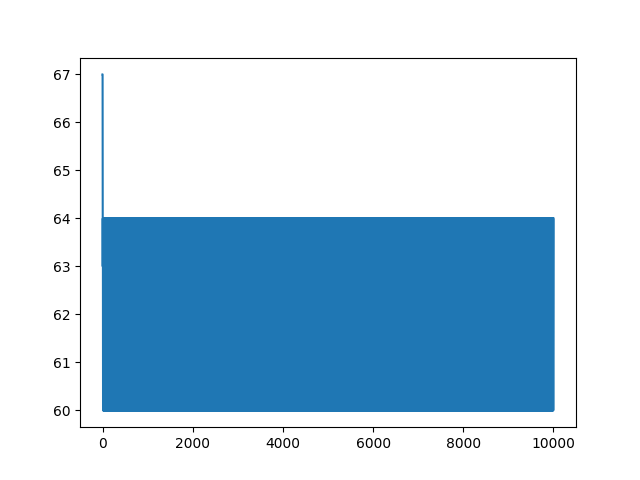

<IPython.core.display.Javascript object>


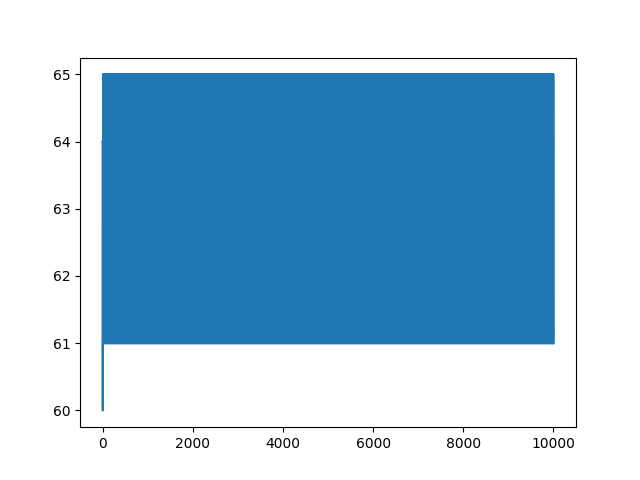

<IPython.core.display.Javascript object>


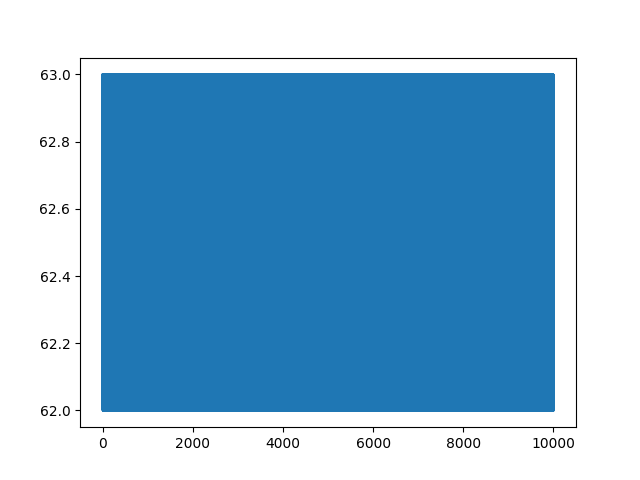

<IPython.core.display.Javascript object>


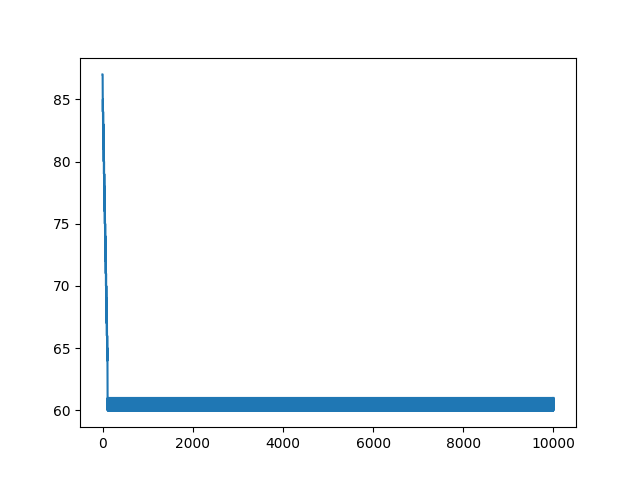

<IPython.core.display.Javascript object>


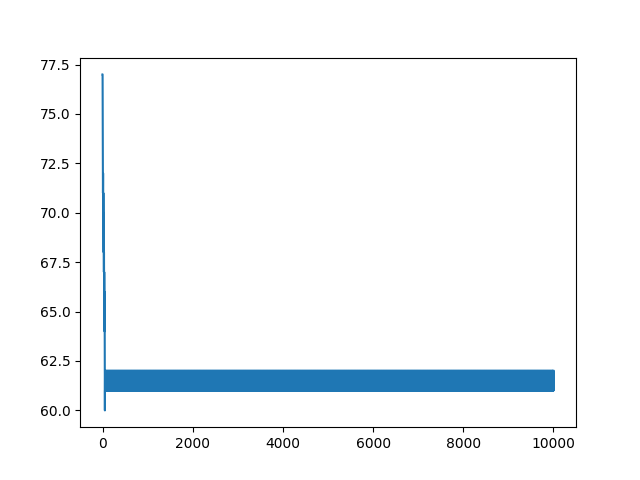

<IPython.core.display.Javascript object>


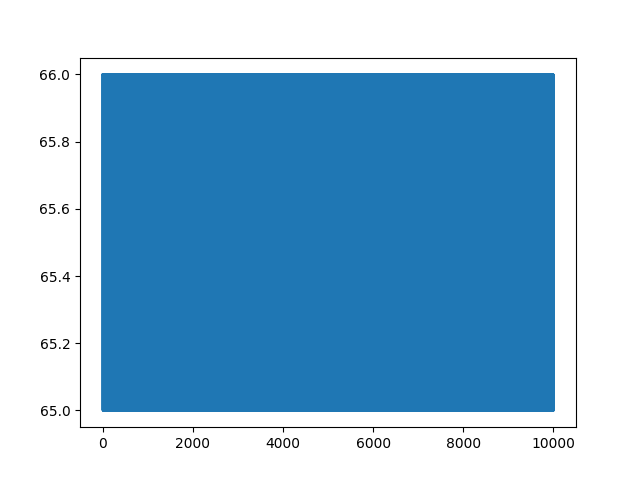

<IPython.core.display.Javascript object>


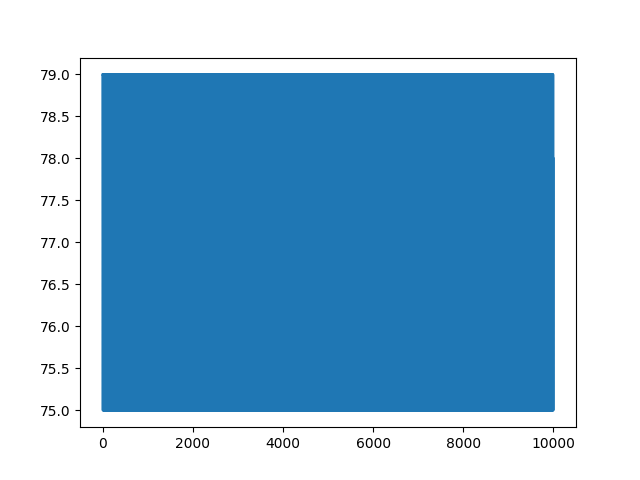

<IPython.core.display.Javascript object>


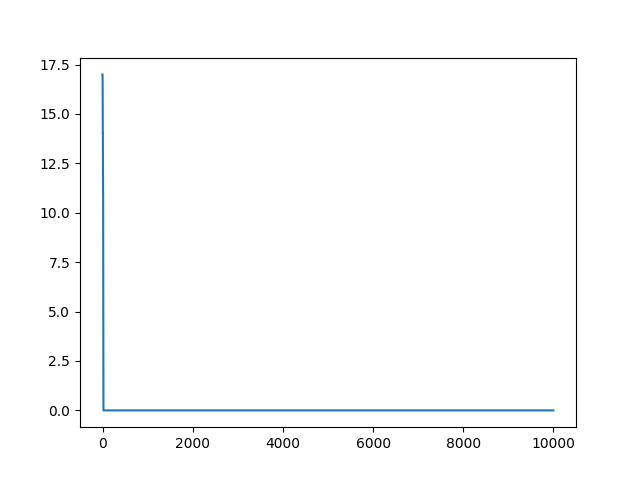

<IPython.core.display.Javascript object>


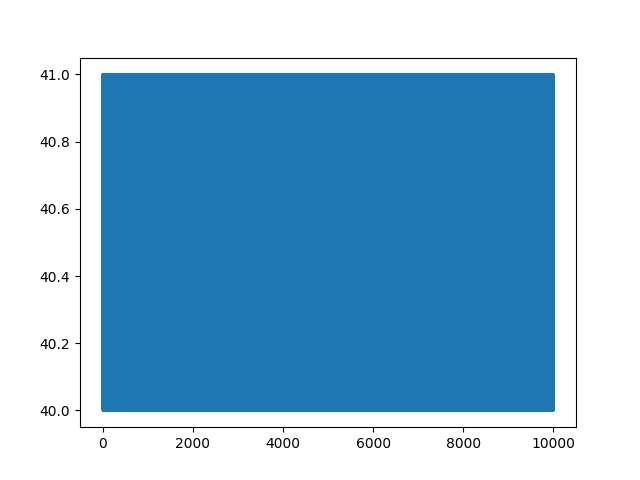

<IPython.core.display.Javascript object>


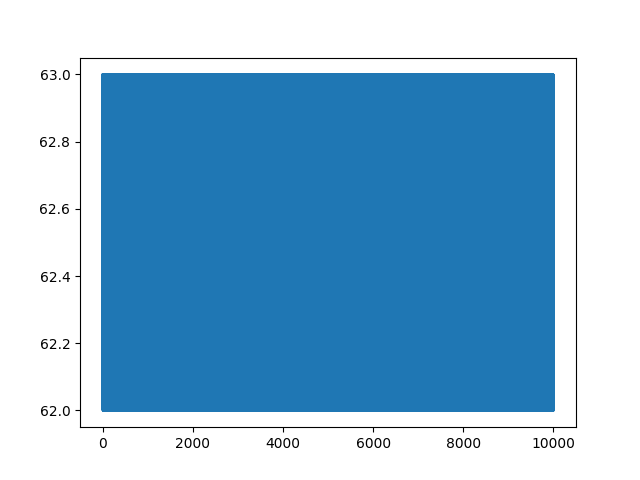

<IPython.core.display.Javascript object>


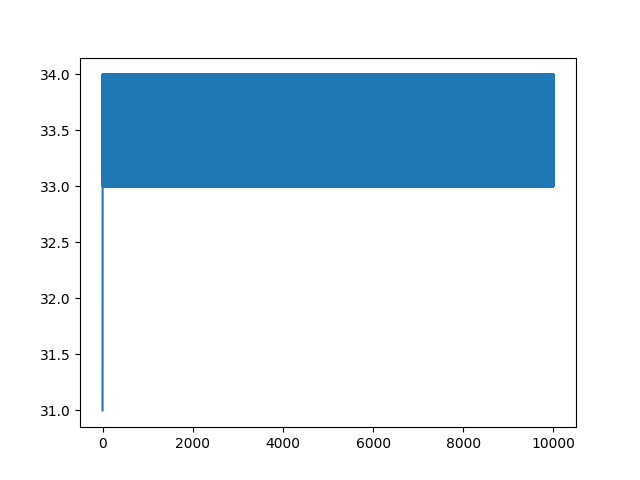

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


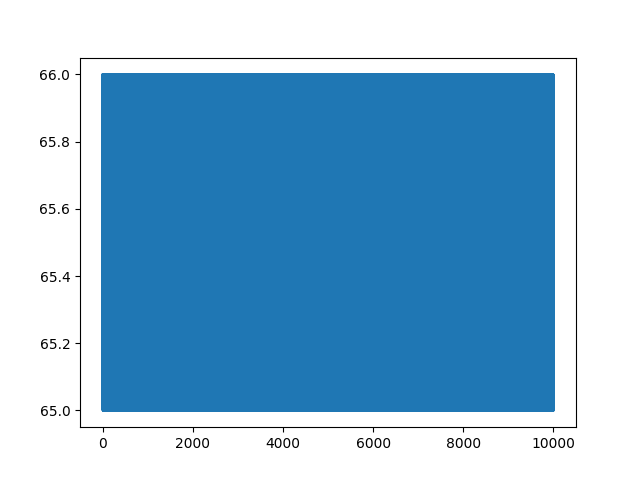

<IPython.core.display.Javascript object>


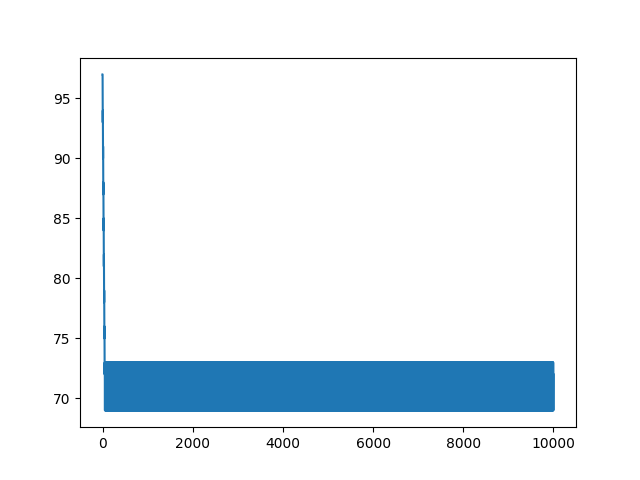

<IPython.core.display.Javascript object>


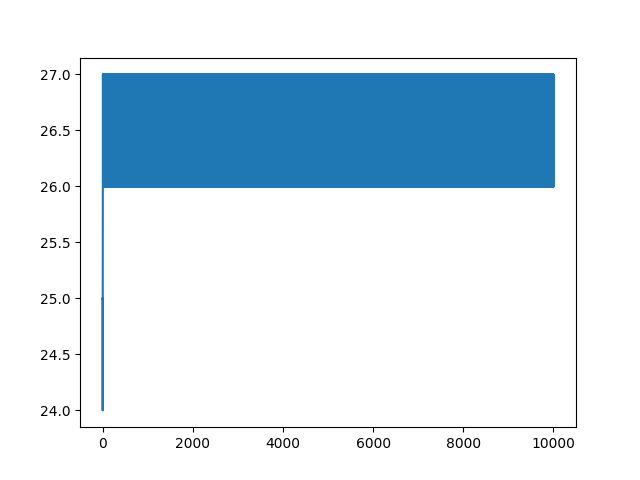

<IPython.core.display.Javascript object>


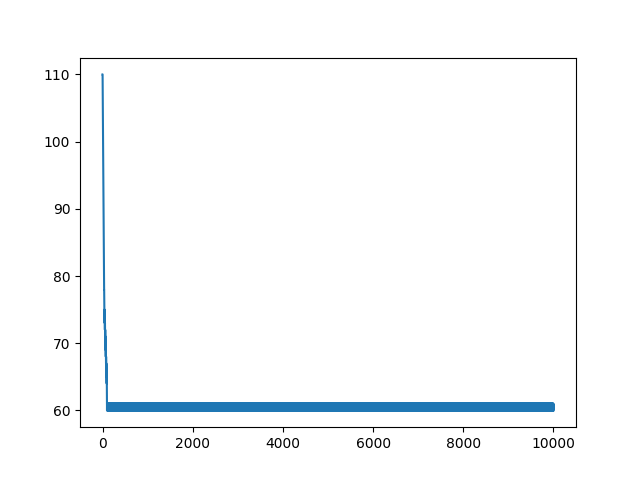

<IPython.core.display.Javascript object>


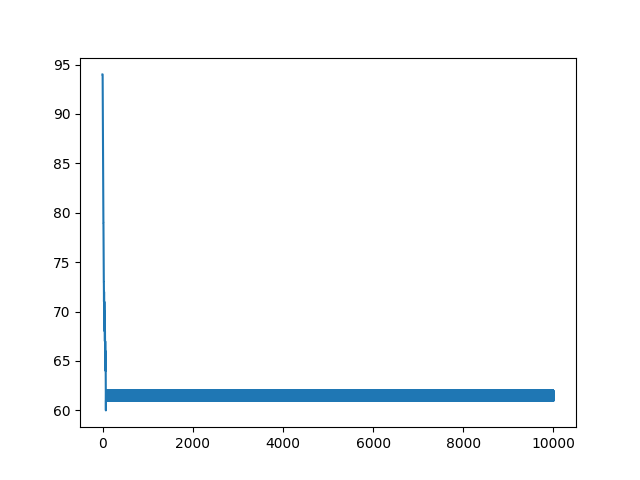

<IPython.core.display.Javascript object>


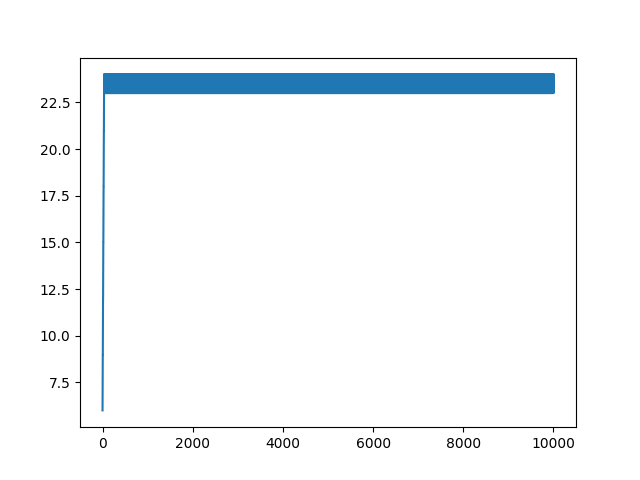

<IPython.core.display.Javascript object>


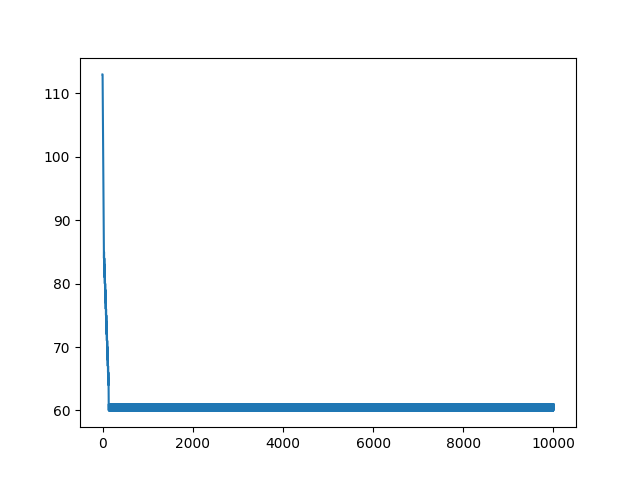

<IPython.core.display.Javascript object>


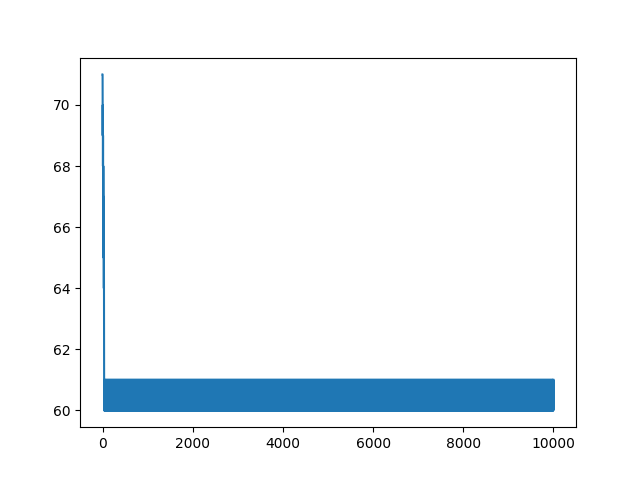

In [29]:
for episode, cc in enumerate(contrasts):
    plt.figure()
    plt.plot(rec_episodes[episode].records[0])


In [30]:
 print(np.mean(rec_episodes[6].records[0]),':',np.mean(rec_episodes[6].records[3]))


65.5001 : 0.0002


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


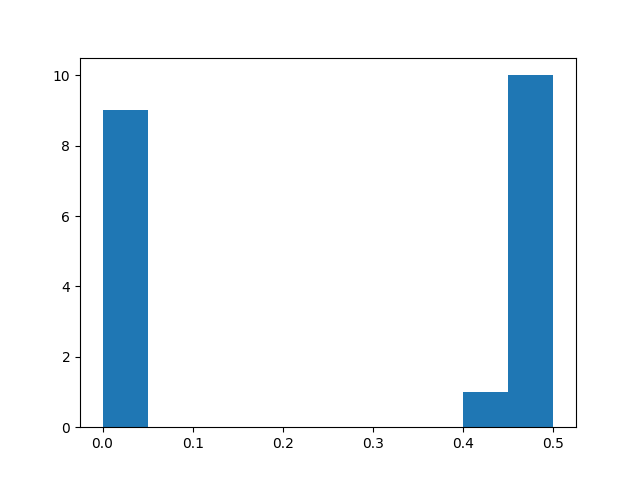

(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 10.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

In [34]:
qq=[]
for episode, cc in  enumerate(contrasts):
    qq.append(np.std(rec_episodes[episode].records[3][100:]))
plt.figure()
plt.hist(qq)

<IPython.core.display.Javascript object>


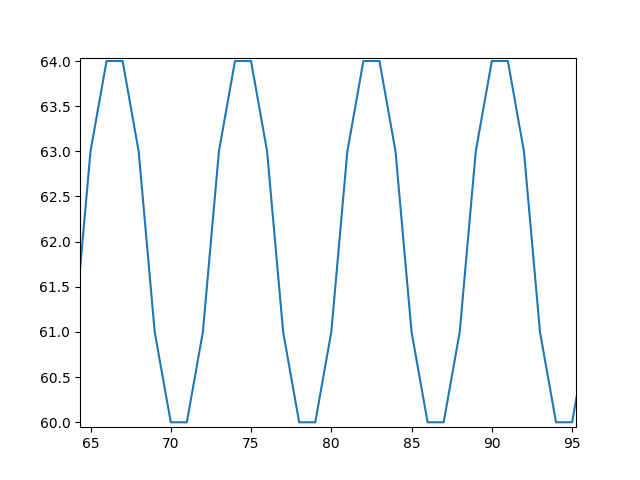

In [35]:
    plt.figure()
    plt.plot(rec_episodes[1].records[0][-100:])